Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0 1 2 3]

 Descriptive statistics for numerical attributes:
               acc_t          acc_x          acc_y          acc_z  \
count  120000.000000  120000.000000  120000.000000  120000.000000   
mean      158.709513       0.715116      -0.588486      -0.194737   
std        91.697835       6.994880       7.695593       5.202588   
min         0.006450     -46.332860     -44.904984     -37.971961   
25%        79.277803      -0.995190      -3.029648      -2.134568   
50%       158.521405       0.013580      -0.045812      -0.008062   
75%       238.356836       1.390618       0.817100       0.644350   
max       317.552643      58.549167      81.035954      69.679136   

             acc_abs         gyro_x         gyro_y         gyro_z  \
count  120000.000000  120000.000000  120000.000000  120000.000000   
mean        7.503322       0.019729       0.040319

<ipython-input-1-76dcf1fce0ed>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[features] = scaler.fit_transform(train_df[features])
<ipython-input-1-76dcf1fce0ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[features] = scaler.transform(val_df[features])
<ipython-input-1-76dcf1fce0ed>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

train tensor values
torch.Size([72, 1000, 9])
tensor([-0.1104,  0.1509, -0.0125, -0.7702,  0.0127, -0.0679,  0.0372, -1.7315,
         0.0240])
X_val:
torch.Size([24, 1000, 9])
test:
torch.Size([24, 1000, 9])


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [1/15], Train Accuracy: 36.11%, Train Loss: 1.3762, Validation Accuracy: 50.00%, Validation Loss: 1.3479
Epoch [2/15], Train Accuracy: 50.00%, Train Loss: 1.3286, Validation Accuracy: 58.33%, Validation Loss: 1.2688
Epoch [3/15], Train Accuracy: 58.33%, Train Loss: 1.1741, Validation Accuracy: 83.33%, Validation Loss: 1.0159
Epoch [4/15], Train Accuracy: 73.61%, Train Loss: 0.9347, Validation Accuracy: 79.17%, Validation Loss: 0.8340
Epoch [5/15], Train Accuracy: 65.28%, Train Loss: 1.0556, Validation Accuracy: 58.33%, Validation Loss: 1.8254
Epoch [6/15], Train Accuracy: 63.89%, Train Loss: 1.0100, Validation Accuracy: 75.00%, Validation Loss: 0.5402
Epoch [7/15], Train Accuracy: 86.11%, Train Loss: 0.5324, Validation Accuracy: 91.67%, Validation Loss: 0.4385
Epoch [8/15], Train Accuracy: 84.72%, Train Loss: 0.5201, Validation Accuracy: 91.67%, Validation Loss: 0.4180
Epoch [9/15], Train Accuracy: 87.50%, Train Loss: 0.4327, Validation Accuracy: 91.67%, Validation Loss: 0.3420
E

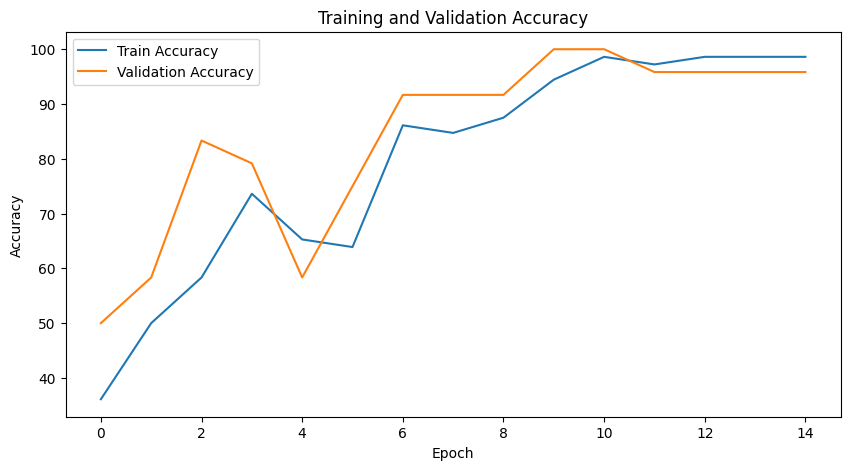

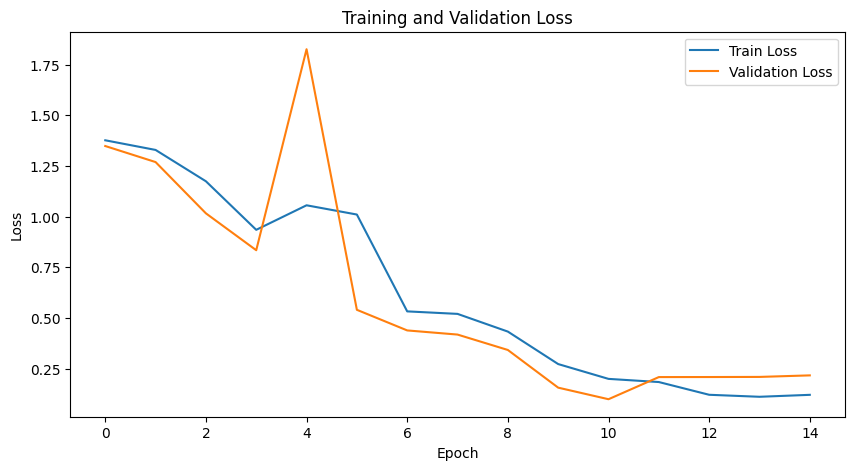

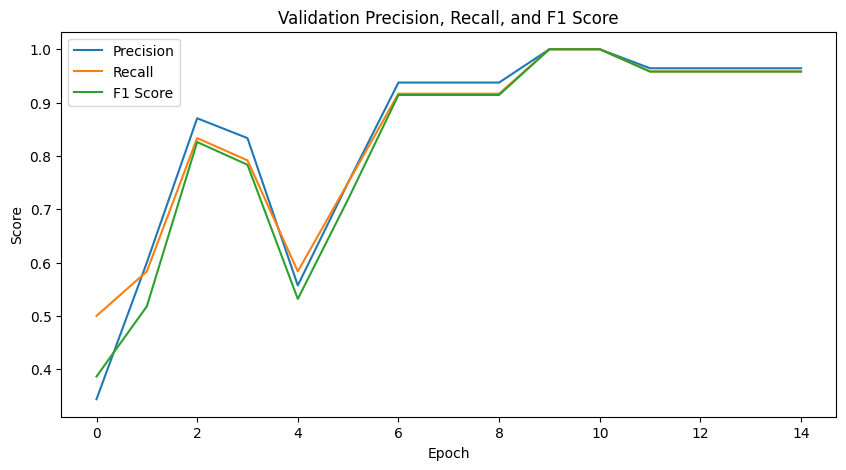

Test Accuracy: 91.67%


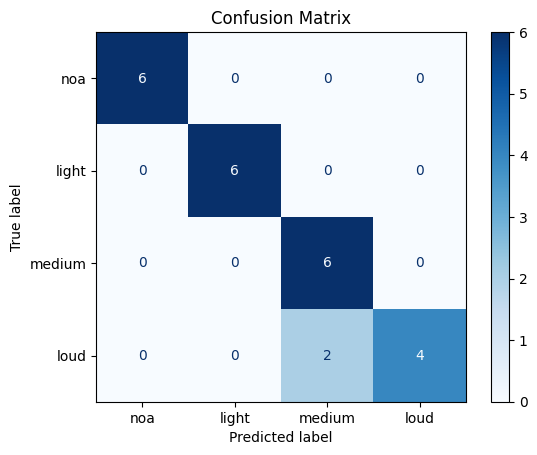

              precision    recall  f1-score   support

         noa       1.00      1.00      1.00         6
       light       1.00      1.00      1.00         6
      medium       0.75      1.00      0.86         6
        loud       1.00      0.67      0.80         6

    accuracy                           0.92        24
   macro avg       0.94      0.92      0.91        24
weighted avg       0.94      0.92      0.91        24



In [1]:
# Mounting google drive
from google.colab import drive
drive.mount("/content/drive")

# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import json

# Read data from google drive
df = pd.read_csv("/content/drive/MyDrive/final_dataframe.csv")

# Mapping the labels to numeric values
label_mapping = {'noa': 0, 'light': 1, 'medium': 2, 'loud': 3}
df['label'] = df['label'].map(label_mapping)

# Check the mapping
print(df['label'].unique())

# Basic statistics about the dataset
print("\n Descriptive statistics for numerical attributes:")
print(df.describe(include='all'))

# Extract unique recording_ids and their corresponding labels
recording_ids = df['recording_id'].unique()
labels = df.groupby('recording_id')['label'].first().values

# Stratified split based on recording_ids and labels
train_ids, temp_ids, y_train, y_temp = train_test_split(recording_ids, labels, test_size=0.4, stratify=labels)
val_ids, test_ids, y_val, y_test = train_test_split(temp_ids, y_temp, test_size=0.5, stratify=y_temp)

# Ensure there is no overlap
assert not set(train_ids).intersection(set(val_ids))
assert not set(train_ids).intersection(set(test_ids))
assert not set(val_ids).intersection(set(test_ids))

print('train-ids:', train_ids)
print('val-ids:', val_ids)
print('test-ids:', test_ids)

# Create dataframes for train, validation, and test sets
train_df = df[df['recording_id'].isin(train_ids)]
val_df = df[df['recording_id'].isin(val_ids)]
test_df = df[df['recording_id'].isin(test_ids)]

# Features to be standardized
features = ['acc_x', 'acc_y', 'acc_z', 'acc_abs', 'gyro_x', 'gyro_y', 'gyro_z', 'pressure', 'audio']

print('Check train features:')
print(train_df.head())

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
train_df[features] = scaler.fit_transform(train_df[features])

# Transform the validation and test data using the same scaler
val_df[features] = scaler.transform(val_df[features])
test_df[features] = scaler.transform(test_df[features])

# Reshape data into 10-second recordings
def reshape_data(df, features):
    recording_ids = df['recording_id'].unique()
    recordings = []
    labels = []

    for rid in recording_ids:
        subset = df[df['recording_id'] == rid][features]
        if len(subset) == 1000:  # Ensure exactly 1000 time steps
            recordings.append(subset.values)
            labels.append(df[df['recording_id'] == rid]['label'].iloc[0])

    return np.array(recordings), np.array(labels)

X_train, y_train = reshape_data(train_df, features)
X_val, y_val = reshape_data(val_df, features)
X_test, y_test = reshape_data(test_df, features)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print('train tensor values')
print(X_train_tensor.shape)
print(X_train_tensor[0][0])
print('X_val:')
print(X_val_tensor.shape)
print('test:')
print(X_test_tensor.shape)

# Custom Dataset Class
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = TimeSeriesDataset(X_train_tensor, y_train_tensor)
val_dataset = TimeSeriesDataset(X_val_tensor, y_val_tensor)
test_dataset = TimeSeriesDataset(X_test_tensor, y_test_tensor)

# Define batch size
batch_size = 6  # Small batch size

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.5):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

# Define model parameters
input_size = X_train.shape[2]
hidden_size = 64
num_layers = 2
num_classes = 4

# Initialize model, criterion, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 15
metrics = {
    'train_accuracy': [],
    'val_accuracy': [],
    'train_loss': [],
    'val_loss': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0
    running_loss_train = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        running_loss_train += loss.item()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    train_accuracy = 100 * correct_train / total_train
    train_loss = running_loss_train / len(train_loader)
    metrics['train_accuracy'].append(train_accuracy)
    metrics['train_loss'].append(train_loss)

    # Validation accuracy and loss
    model.eval()
    correct_val = 0
    total_val = 0
    running_loss_val = 0.0
    all_val_preds = []
    all_val_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
            running_loss_val += loss.item()
            all_val_preds.extend(predicted.cpu().numpy())
            all_val_labels.extend(labels.cpu().numpy())

    val_accuracy = 100 * correct_val / total_val
    val_loss = running_loss_val / len(val_loader)
    metrics['val_accuracy'].append(val_accuracy)
    metrics['val_loss'].append(val_loss)

    # Calculate precision, recall, and F1-score for validation set
    val_report = classification_report(all_val_labels, all_val_preds, output_dict=True)
    metrics['precision'].append(val_report['weighted avg']['precision'])
    metrics['recall'].append(val_report['weighted avg']['recall'])
    metrics['f1_score'].append(val_report['weighted avg']['f1-score'])

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.2f}%, Train Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {val_loss:.4f}')

# Save metrics to a JSON file
with open('metrics.json', 'w') as f:
    json.dump(metrics, f)

# Plotting the metrics
plt.figure(figsize=(10, 5))
plt.plot(metrics['train_accuracy'], label='Train Accuracy')
plt.plot(metrics['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(metrics['train_loss'], label='Train Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('loss_plot.png')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(metrics['precision'], label='Precision')
plt.plot(metrics['recall'], label='Recall')
plt.plot(metrics['f1_score'], label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation Precision, Recall, and F1 Score')
plt.legend()
plt.savefig('score_plot.png')
plt.show()

# Test loop and confusion matrix
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Classification report for test set
test_report = classification_report(all_labels, all_preds, target_names=list(label_mapping.keys()))
print(test_report)


In [2]:
## Scruture data for TCN

## Scruture data for TCN

## TCN strcutures
